<a href="https://colab.research.google.com/github/danielabel0918/Diss2024/blob/main/Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("survminer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘lme4’, ‘car’, ‘rstatix’, ‘ggpubr’




In [ ]:
# Load necessary libraries
library(survival)
library(survminer)
library(dplyr)

# Load your data
clinical_data <- read.csv("/content/clinical_data.csv")
features_data <- read.csv("/content/extracted_features.csv")

    graph_id        ID                  X0                  X1           
 Min.   :  0   Length:397         Min.   :-0.439261   Min.   :-0.370073  
 1st Qu.: 99   Class :character   1st Qu.: 0.006364   1st Qu.: 0.007521  
 Median :198   Mode  :character   Median : 0.071884   Median : 0.095120  
 Mean   :198                      Mean   : 0.089188   Mean   : 0.094418  
 3rd Qu.:297                      3rd Qu.: 0.151038   3rd Qu.: 0.169996  
 Max.   :396                      Max.   : 0.661602   Max.   : 0.572770  
       X2                  X3                 X4                 X5          
 Min.   :-0.381305   Min.   :-0.56776   Min.   :-0.20963   Min.   :-0.49591  
 1st Qu.:-0.074936   1st Qu.:-0.07446   1st Qu.: 0.05432   1st Qu.:-0.08454  
 Median :-0.001790   Median :-0.01002   Median : 0.12324   Median :-0.01346  
 Mean   : 0.003217   Mean   :-0.01805   Mean   : 0.13055   Mean   :-0.01673  
 3rd Qu.: 0.066734   3rd Qu.: 0.04905   3rd Qu.: 0.19244   3rd Qu.: 0.06323  
 Max.   : 0.40

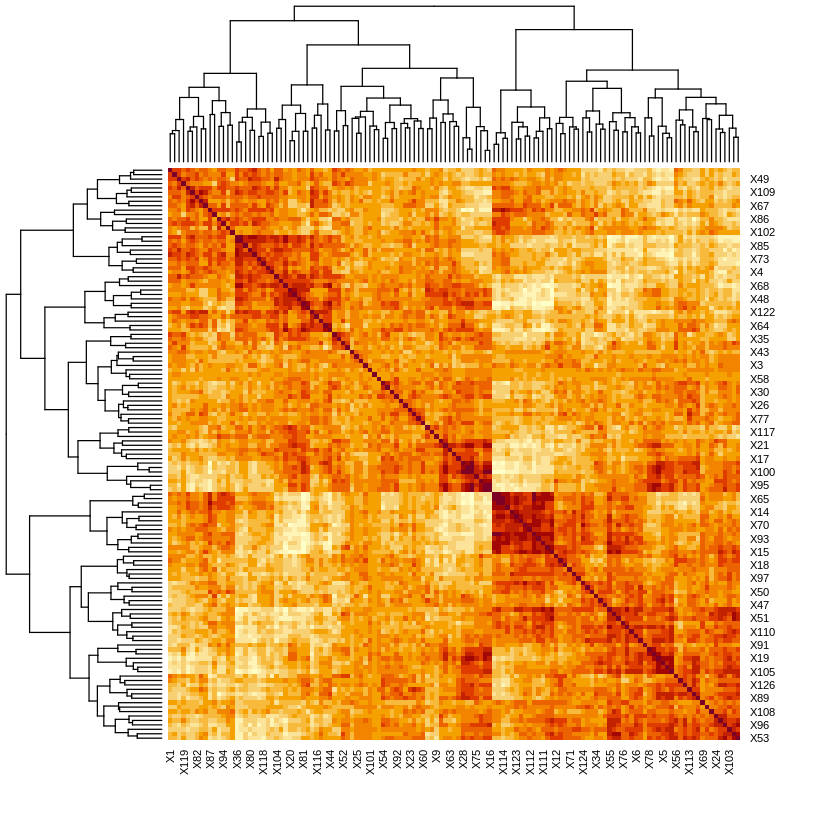

In [ ]:
# Summary statistics of features
summary(features_data)

# Assuming the first two columns are 'graph_id' and 'ID'
# Select only the numeric columns for correlation
numeric_features_data <- features_data[, sapply(features_data, is.numeric)]

# Calculate the correlation matrix on the numeric data
cor_matrix <- cor(numeric_features_data, use = "pairwise.complete.obs")

# Visualize the correlation matrix using a heatmap
heatmap(cor_matrix, symm = TRUE)

In [ ]:
#Merge Data

# Ensure the ID columns are of the same type
clinical_data$ID <- as.character(clinical_data$ID)
features_data$ID <- as.character(features_data$ID)

# Merge the datasets based on the ID column
merged_data <- merge(clinical_data, features_data, by = "ID")

# Print the first few rows of the merged data to verify
print(head(merged_data))

                  ID Gender Age_at_scan_years
1 UPENN-GBM-00001_11      F             52.16
2 UPENN-GBM-00002_11      F             61.30
3 UPENN-GBM-00003_11      M             42.82
4 UPENN-GBM-00005_11      M             53.33
5 UPENN-GBM-00006_11      M             52.99
6 UPENN-GBM-00007_11      M             56.96
  Survival_from_surgery_days_UPDATED Survival_Status Survival_Censor     IDH1
1                                960        Deceased   Not Available Wildtype
2                                291        Deceased   Not Available Wildtype
3                               2838        Deceased   Not Available Wildtype
4                               1143        Deceased   Not Available Wildtype
5                                626        Deceased   Not Available Wildtype
6                                348        Deceased   Not Available Wildtype
           MGMT           KPS GTR_over90percent Time_since_baseline_preop
1 Not Available Not Available                 Y           

In [ ]:
#Isolating Feature Columns

# Extract feature columns (14th to 141st) from the merged data
feature_columns <- merged_data[, 14:(14 + 128 - 1)]

# Verify by printing the first few rows of the feature columns
print(head(feature_columns))

         X0          X1          X2          X3          X4           X5
1 0.1315941  0.11847461 -0.01134149  0.03767516  0.20405770 -0.003494738
2 0.1923327  0.01404055 -0.24541172 -0.14363326  0.16253880  0.045836800
3 0.2007881  0.03279922 -0.14224197  0.03981219  0.03549671  0.102380540
4 0.1203149 -0.01654399  0.03200898 -0.03357314  0.13441117  0.117307750
5 0.2346174 -0.07074377 -0.05056234  0.05339116 -0.04291343  0.088676700
6 0.1341510 -0.11386853 -0.05777114 -0.03314937  0.14946738  0.124393000
          X6         X7          X8          X9         X10         X11
1 0.07043404 0.15099737  0.06089771 -0.03165664 -0.05461328 -0.02711799
2 0.19550556 0.36490747  0.24213511 -0.09758101 -0.25427392 -0.16490720
3 0.04780229 0.07815023  0.10519397 -0.10269798 -0.19993189  0.06175675
4 0.22708520 0.06688589 -0.02946526 -0.03991745 -0.01727876 -0.05517571
5 0.16261238 0.08187969  0.25441733 -0.10610627 -0.27683923 -0.14364370
6 0.20232490 0.08908098  0.12035873  0.01326309 -0.087512

In [ ]:
print(merged_data$GTR_over90percent)

  [1] "Y"             "Y"             "Y"             "Y"            
  [5] "Y"             "Y"             "Y"             "Y"            
  [9] "Y"             "Y"             "Y"             "Y"            
 [13] "Y"             "Y"             "Y"             "Y"            
 [17] "Y"             "Not Available" "N"             "Y"            
 [21] "Y"             "Y"             "N"             "Y"            
 [25] "Y"             "N"             "Y"             "N"            
 [29] "Y"             "Y"             "N"             "Y"            
 [33] "Y"             "Y"             "Y"             "Y"            
 [37] "Y"             "Y"             "N"             "Y"            
 [41] "Y"             "Y"             "Y"             "Y"            
 [45] "Y"             "Y"             "Y"             "Y"            
 [49] "Y"             "Y"             "Y"             "Y"            
 [53] "Y"             "Y"             "Y"             "Y"            
 [57] "Y"           

In [ ]:
#Clean Survival time and status data

# Convert 'deceased' to 1 and 'alive' to 0
merged_data[["Survival_Status"]] <- ifelse(grepl("deceased", merged_data[["Survival_Status"]], ignore.case = TRUE), 1,
                              ifelse(grepl("alive", merged_data[["Survival_Status"]], ignore.case = TRUE), 0, NA))

# Replace non-numeric entries with NA and convert to numeric
merged_data[["Survival_from_surgery_days_UPDATED"]] <- as.numeric(gsub("[^0-9]", "", merged_data[["Survival_from_surgery_days_UPDATED"]]))

# Remove rows with NA in survival time or status_numeric
merged_data <- merged_data[!is.na(merged_data[["Survival_from_surgery_days_UPDATED"]]) & !is.na(merged_data[["Survival_Status"]]), ]

# Verify the cleaned survival time data
selected_columns <- merged_data[, c("Survival_from_surgery_days_UPDATED", "Survival_Status")]
print(head(merged_data))

                  ID Gender Age_at_scan_years
1 UPENN-GBM-00001_11      F             52.16
2 UPENN-GBM-00002_11      F             61.30
3 UPENN-GBM-00003_11      M             42.82
4 UPENN-GBM-00005_11      M             53.33
5 UPENN-GBM-00006_11      M             52.99
6 UPENN-GBM-00007_11      M             56.96
  Survival_from_surgery_days_UPDATED Survival_Status Survival_Censor     IDH1
1                                960               1   Not Available Wildtype
2                                291               1   Not Available Wildtype
3                               2838               1   Not Available Wildtype
4                               1143               1   Not Available Wildtype
5                                626               1   Not Available Wildtype
6                                348               1   Not Available Wildtype
           MGMT           KPS GTR_over90percent Time_since_baseline_preop
1 Not Available Not Available                 Y           

In [ ]:
# Assuming your data is in a data frame called 'merged_data'
merged_data <- merged_data[merged_data$GTR_over90percent != "Not Available", ]

# Print the filtered data to verify
print(head(filtered_data))

                  ID Gender Age_at_scan_years
1 UPENN-GBM-00001_11      F             52.16
2 UPENN-GBM-00002_11      F             61.30
3 UPENN-GBM-00003_11      M             42.82
4 UPENN-GBM-00005_11      M             53.33
5 UPENN-GBM-00006_11      M             52.99
6 UPENN-GBM-00007_11      M             56.96
  Survival_from_surgery_days_UPDATED Survival_Status Survival_Censor     IDH1
1                                960               1   Not Available Wildtype
2                                291               1   Not Available Wildtype
3                               2838               1   Not Available Wildtype
4                               1143               1   Not Available Wildtype
5                                626               1   Not Available Wildtype
6                                348               1   Not Available Wildtype
           MGMT           KPS GTR_over90percent Time_since_baseline_preop
1 Not Available Not Available                 Y           

In [ ]:
# Univariable Cox regression for each variable
cox_age <- coxph(Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ Age_at_scan_years, data = merged_data)
summary(cox_age)

cox_gender <- coxph(Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ Gender, data = merged_data)
summary(cox_gender)

cox_GTR <- coxph(Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ GTR_over90percent, data = merged_data)
summary(cox_GTR)

cox_IDH <- coxph(Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ IDH1, data = merged_data)
summary(cox_IDH)

Call:
coxph(formula = Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ 
    Age_at_scan_years, data = merged_data)

  n= 366, number of events= 366 

                      coef exp(coef) se(coef)     z Pr(>|z|)    
Age_at_scan_years 0.021597  1.021832 0.004866 4.438 9.08e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                  exp(coef) exp(-coef) lower .95 upper .95
Age_at_scan_years     1.022     0.9786     1.012     1.032

Concordance= 0.604  (se = 0.017 )
Likelihood ratio test= 20.51  on 1 df,   p=6e-06
Wald test            = 19.7  on 1 df,   p=9e-06
Score (logrank) test = 19.6  on 1 df,   p=1e-05


Call:
coxph(formula = Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ 
    Gender, data = merged_data)

  n= 366, number of events= 366 

          coef exp(coef) se(coef)     z Pr(>|z|)
GenderM 0.0585    1.0602   0.1077 0.543    0.587

        exp(coef) exp(-coef) lower .95 upper .95
GenderM      1.06     0.9432    0.8584      1.31

Concordance= 0.487  (se = 0.015 )
Likelihood ratio test= 0.3  on 1 df,   p=0.6
Wald test            = 0.29  on 1 df,   p=0.6
Score (logrank) test = 0.29  on 1 df,   p=0.6


Call:
coxph(formula = Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ 
    GTR_over90percent, data = merged_data)

  n= 366, number of events= 366 

                      coef exp(coef) se(coef)     z Pr(>|z|)   
GTR_over90percentY -0.2925    0.7464   0.1091 -2.68  0.00736 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                   exp(coef) exp(-coef) lower .95 upper .95
GTR_over90percentY    0.7464       1.34    0.6027    0.9244

Concordance= 0.566  (se = 0.015 )
Likelihood ratio test= 6.98  on 1 df,   p=0.008
Wald test            = 7.18  on 1 df,   p=0.007
Score (logrank) test = 7.23  on 1 df,   p=0.007


Call:
coxph(formula = Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ 
    IDH1, data = merged_data)

  n= 366, number of events= 366 

               coef exp(coef) se(coef)     z Pr(>|z|)  
IDH1Wildtype 0.9978    2.7122   0.4521 2.207   0.0273 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

             exp(coef) exp(-coef) lower .95 upper .95
IDH1Wildtype     2.712     0.3687     1.118     6.579

Concordance= 0.511  (se = 0.005 )
Likelihood ratio test= 6.84  on 1 df,   p=0.009
Wald test            = 4.87  on 1 df,   p=0.03
Score (logrank) test = 5.28  on 1 df,   p=0.02


Call:
survdiff(formula = Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ 
    age_group, data = merged_data)

                     N Observed Expected (O-E)^2/E (O-E)^2/V
age_group=High Age 183      183      161      3.05      5.53
age_group=Low Age  183      183      205      2.39      5.53

 Chisq= 5.5  on 1 degrees of freedom, p= 0.02 


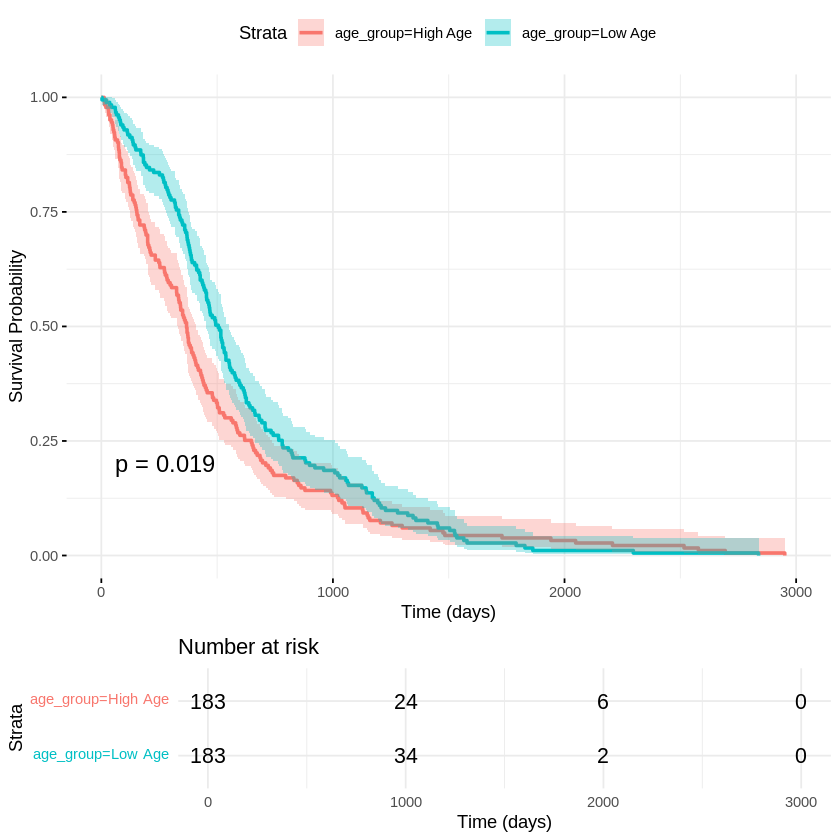

In [ ]:
# Categorize age into groups (e.g., by median)
merged_data$age_group <- ifelse(merged_data$Age_at_scan_years > median(merged_data$Age_at_scan_years, na.rm = TRUE), "High Age", "Low Age")

# Kaplan-Meier plot for age groups
fit_age <- survfit(Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ age_group, data = merged_data)

# Plot Kaplan-Meier survival curves
ggsurvplot(fit_age, data = merged_data,
           pval = TRUE, # Shows the p-value from the log-rank test
           conf.int = TRUE, # Shows the confidence intervals
           risk.table = TRUE, # Displays the number at risk
           ggtheme = theme_minimal(), # Theme for aesthetics
           xlab = "Time (days)",
           ylab = "Survival Probability")

log_rank_test <- survdiff(Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ age_group, data = merged_data)
print(log_rank_test)

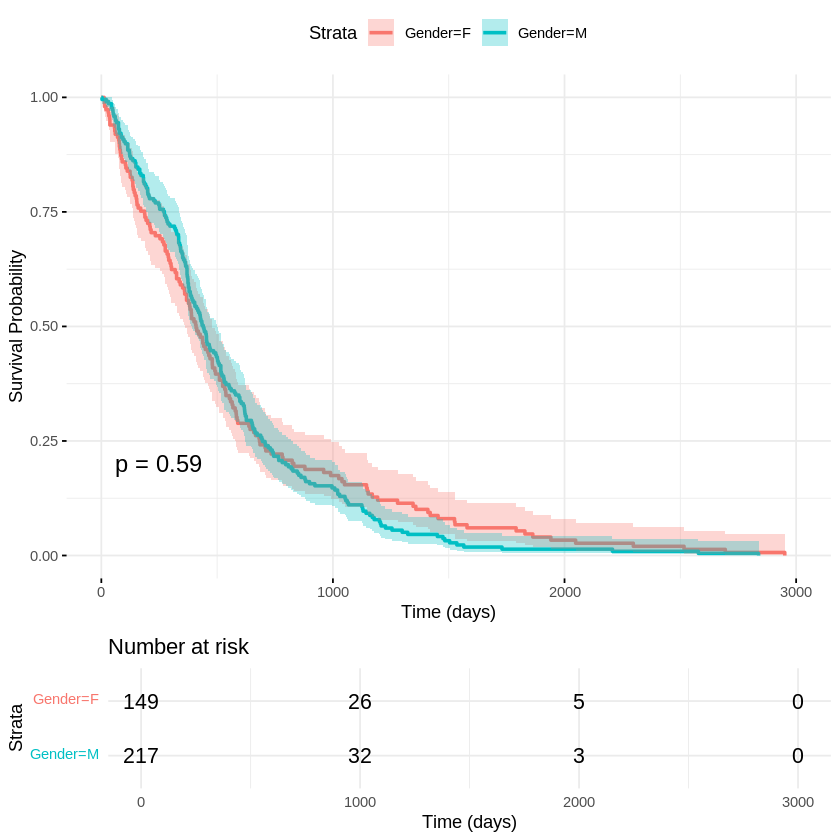

In [ ]:
# Univariable Cox regression for gender
cox_gender <- coxph(Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ Gender, data = merged_data)

# Kaplan-Meier plot for gender
fit_gender <- survfit(Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ Gender, data = merged_data)

# Plot Kaplan-Meier survival curves
ggsurvplot(fit_gender, data = merged_data,
           pval = TRUE,
           conf.int = TRUE,
           risk.table = TRUE,
           ggtheme = theme_minimal(),
           xlab = "Time (days)",
           ylab = "Survival Probability")

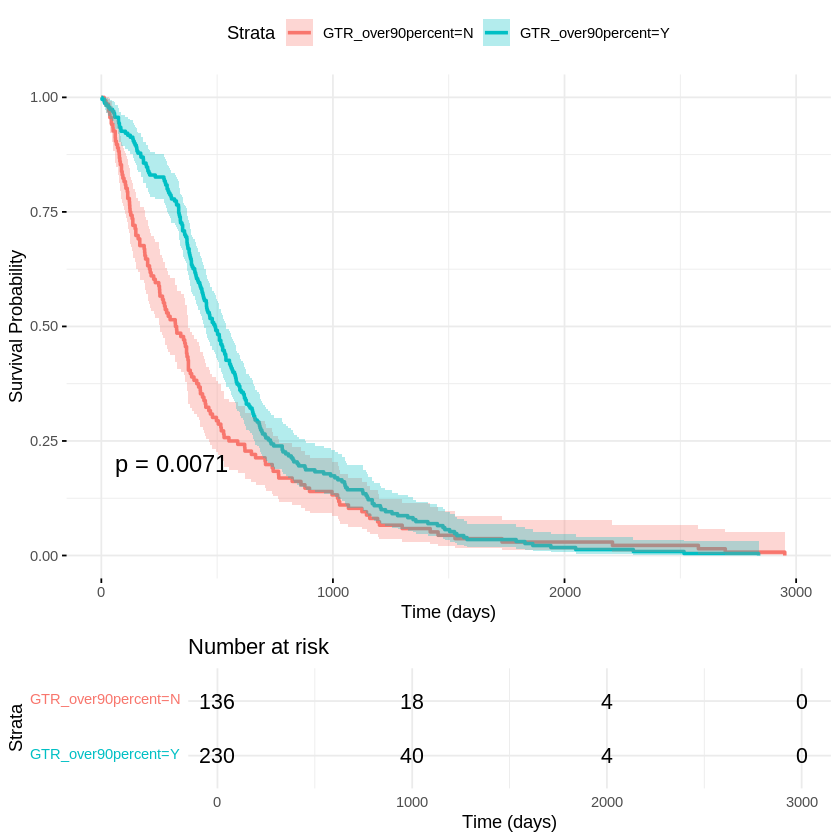

In [ ]:
# Assuming you want to remove "Not Available" from 'GTR_over90percent'
filtered_data <- merged_data[merged_data$GTR_over90percent != "Not Available", ]

# Kaplan-Meier plot for GTR
fit_GTR <- survfit(Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ GTR_over90percent, data = merged_data)

# Plot Kaplan-Meier survival curves
ggsurvplot(fit_GTR, data = filtered_data,
           pval = TRUE,
           conf.int = TRUE,
           risk.table = TRUE,
           ggtheme = theme_minimal(),
           xlab = "Time (days)",
           ylab = "Survival Probability")


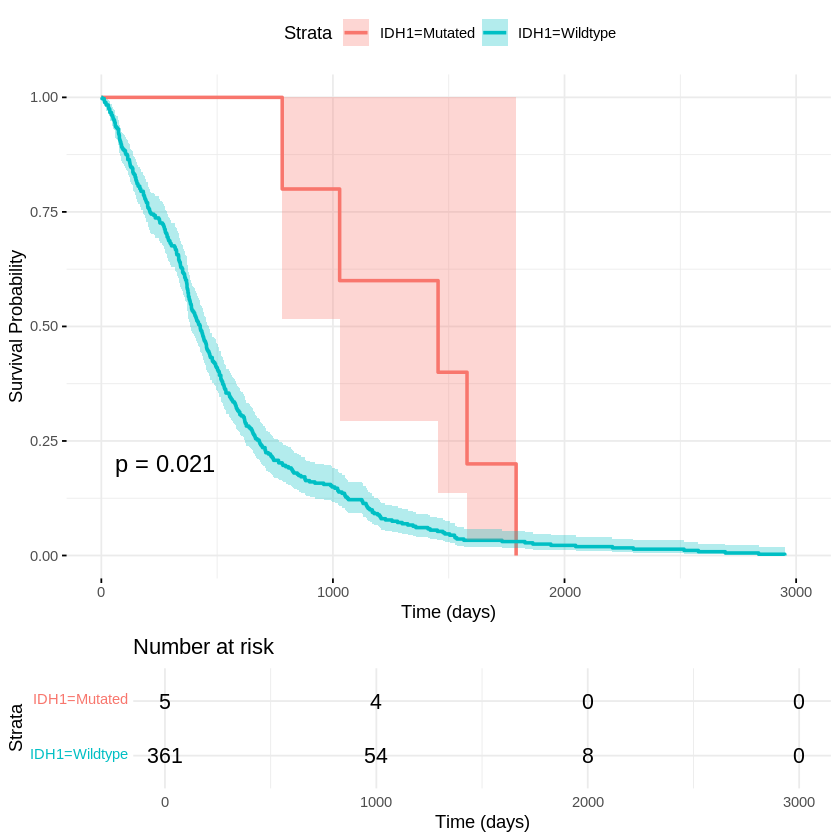

In [ ]:
# Kaplan-Meier plot for IDH
fit_IDH <- survfit(Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ IDH1, data = merged_data)

# Plot Kaplan-Meier survival curves
ggsurvplot(fit_IDH, data = merged_data,
           pval = TRUE,
           conf.int = TRUE,
           risk.table = TRUE,
           ggtheme = theme_minimal(),
           xlab = "Time (days)",
           ylab = "Survival Probability")

In [ ]:
summary(fit_age)
summary(fit_gender)
summary(fit_GTR)
summary(fit_IDH)

Call: survfit(formula = Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ 
    age_group, data = merged_data)

                age_group=High Age 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   12    183       1  0.99454 0.00545     0.983912       1.0000
   13    182       1  0.98907 0.00769     0.974122       1.0000
   14    181       1  0.98361 0.00939     0.965380       1.0000
   20    180       1  0.97814 0.01081     0.957185       0.9996
   30    179       1  0.97268 0.01205     0.949343       0.9966
   31    178       1  0.96721 0.01316     0.941753       0.9934
   32    177       1  0.96175 0.01418     0.934357       0.9899
   37    176       2  0.95082 0.01599     0.920000       0.9827
   44    174       1  0.94536 0.01680     0.912992       0.9789
   48    173       1  0.93989 0.01757     0.906076       0.9750
   50    172       1  0.93443 0.01830     0.899242       0.9710
   51    171       1  0.92896 0.01899     0.892478       0.9669
   54    17

Call: survfit(formula = Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ 
    Gender, data = merged_data)

                Gender=F 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   12    149       1  0.99329 0.00669     0.980265       1.0000
   13    148       1  0.98658 0.00943     0.968272       1.0000
   14    147       1  0.97987 0.01151     0.957570       1.0000
   20    146       1  0.97315 0.01324     0.947545       0.9995
   30    145       1  0.96644 0.01475     0.937955       0.9958
   32    144       1  0.95973 0.01611     0.928680       0.9918
   36    143       1  0.95302 0.01733     0.919643       0.9876
   37    142       2  0.93960 0.01952     0.902114       0.9786
   57    140       1  0.93289 0.02050     0.893562       0.9739
   58    139       1  0.92617 0.02142     0.885126       0.9691
   60    138       1  0.91946 0.02229     0.876791       0.9642
   70    137       1  0.91275 0.02312     0.868546       0.9592
   75    136       1  0.

Call: survfit(formula = Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ 
    GTR_over90percent, data = merged_data)

                GTR_over90percent=N 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   12    136       1  0.99265 0.00733      0.97839       1.0000
   20    135       1  0.98529 0.01032      0.96527       1.0000
   31    134       1  0.97794 0.01259      0.95357       1.0000
   32    133       1  0.97059 0.01449      0.94260       0.9994
   36    132       1  0.96324 0.01614      0.93212       0.9954
   37    131       1  0.95588 0.01761      0.92198       0.9910
   44    130       2  0.94118 0.02018      0.90245       0.9816
   50    128       1  0.93382 0.02132      0.89296       0.9766
   51    127       1  0.92647 0.02238      0.88363       0.9714
   60    126       2  0.91176 0.02432      0.86532       0.9607
   61    124       1  0.90441 0.02521      0.85632       0.9552
   65    123       1  0.89706 0.02606      0.84741       0.9496
  

Call: survfit(formula = Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ 
    IDH1, data = merged_data)

                IDH1=Mutated 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  781      5       1      0.8   0.179       0.5161            1
 1029      4       1      0.6   0.219       0.2933            1
 1454      3       1      0.4   0.219       0.1367            1
 1579      2       1      0.2   0.179       0.0346            1
 1791      1       1      0.0     NaN           NA           NA

                IDH1=Wildtype 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    3    361       1  0.99723 0.00277     0.991823       1.0000
   12    360       1  0.99446 0.00391     0.986832       1.0000
   13    359       1  0.99169 0.00478     0.982369       1.0000
   14    358       1  0.98892 0.00551     0.978180       0.9998
   20    357       1  0.98615 0.00615     0.974167       0.9983
   21    356       1  0.98338 0.00673     0.970280    

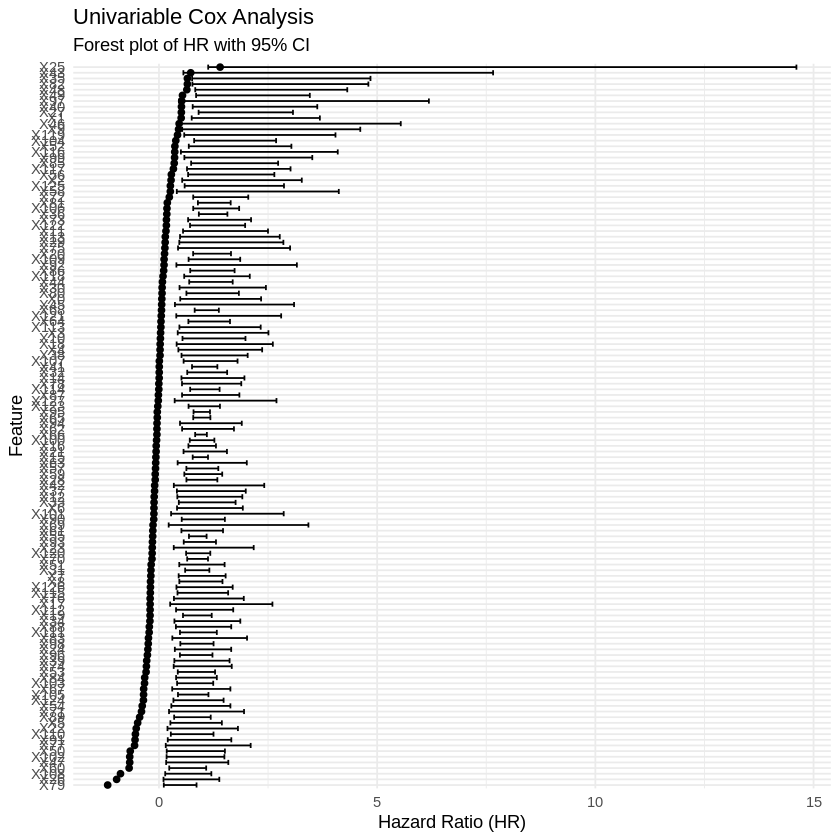

In [ ]:
#Univariable Survival Analysis for Extracted Features

# Get the list of feature names excluding 'graph_id'
feature_names <- colnames(merged_data)[14:141]

# Perform univariable Cox regression for each feature
univariable_results <- list()

for (feature in feature_names) {
  cox_model <- coxph(Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ merged_data[[feature]], data = merged_data)
  univariable_results[[feature]] <- summary(cox_model)
}

# Extracting significant features (p-value < 0.05)
significant_features <- lapply(univariable_results, function(x) if (x$coefficients[,"Pr(>|z|)"] < 0.05) return(x) else return(NULL))
significant_features <- Filter(Negate(is.null), significant_features)

# Collecting hazard ratios, confidence intervals, and p-values
hr_data <- data.frame(
  Feature = character(),
  HR = numeric(),
  LowerCI = numeric(),
  UpperCI = numeric(),
  PValue = numeric(),
  stringsAsFactors = FALSE
)

for (feature in feature_names) {
  cox_summary <- univariable_results[[feature]]
  hr <- cox_summary$coefficients[1]
  lower_ci <- cox_summary$conf.int[,"lower .95"]
  upper_ci <- cox_summary$conf.int[,"upper .95"]
  p_value <- cox_summary$coefficients[,"Pr(>|z|)"]

  hr_data <- rbind(hr_data, data.frame(
    Feature = feature,
    HR = hr,
    LowerCI = lower_ci,
    UpperCI = upper_ci,
    PValue = p_value
  ))
}

# Visualize the results with a forest plot
ggplot(hr_data, aes(x = reorder(Feature, HR), y = HR)) +
  geom_point() +
  geom_errorbar(aes(ymin = LowerCI, ymax = UpperCI)) +
  coord_flip() +
  labs(title = "Univariable Cox Analysis",
       x = "Feature",
       y = "Hazard Ratio (HR)",
       subtitle = "Forest plot of HR with 95% CI") +
  theme_minimal()

In [ ]:
print(hr_data[hr_data$PValue < 0.05,])

   Feature        HR   LowerCI    UpperCI     PValue
26     X25  1.401002 1.1279965 14.6078827 0.03200817
80     X79 -1.175137 0.1107267  0.8610656 0.02471429


[1] "Cox Model for Extracted Feature: X25"
Call:
coxph(formula = formula, data = merged_data)

  n= 366, number of events= 366 

                        coef exp(coef)  se(coef)      z Pr(>|z|)    
Age_at_scan_years   0.017819  1.017979  0.005125  3.477 0.000507 ***
GenderM             0.072022  1.074679  0.108645  0.663 0.507387    
IDH1Wildtype        0.750536  2.118135  0.460763  1.629 0.103334    
GTR_over90percentY -0.226004  0.797715  0.110400 -2.047 0.040645 *  
X25                 1.095530  2.990766  0.660518  1.659 0.097198 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                   exp(coef) exp(-coef) lower .95 upper .95
Age_at_scan_years     1.0180     0.9823    1.0078    1.0283
GenderM               1.0747     0.9305    0.8686    1.3297
IDH1Wildtype          2.1181     0.4721    0.8585    5.2258
GTR_over90percentY    0.7977     1.2536    0.6425    0.9904
X25                   2.9908     0.3344    0.8195   10.9148

Concordance= 0.626  (se = 0.

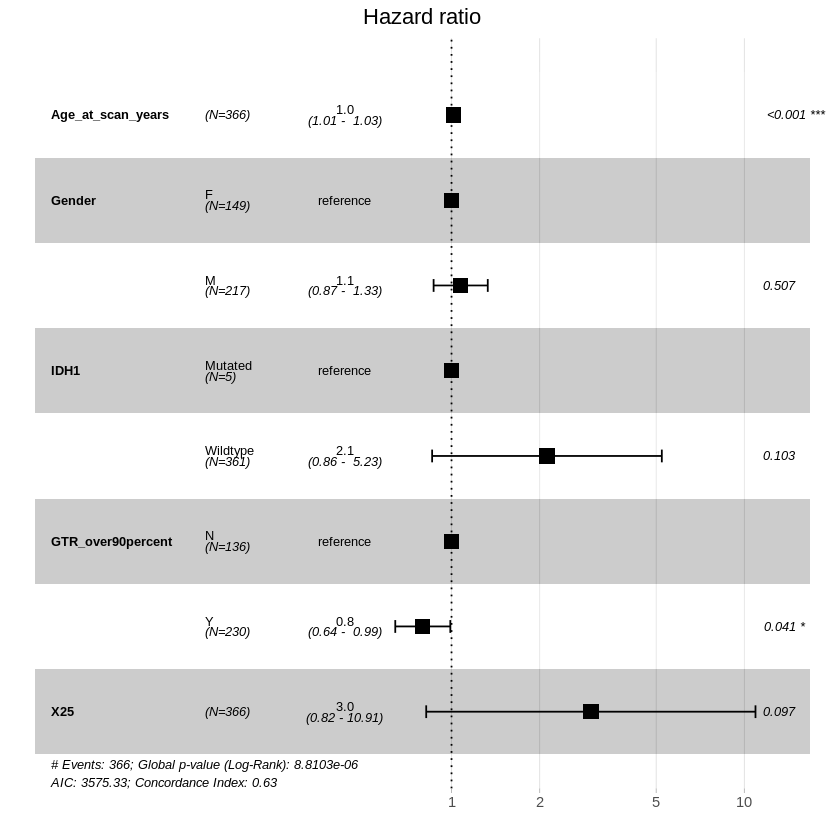

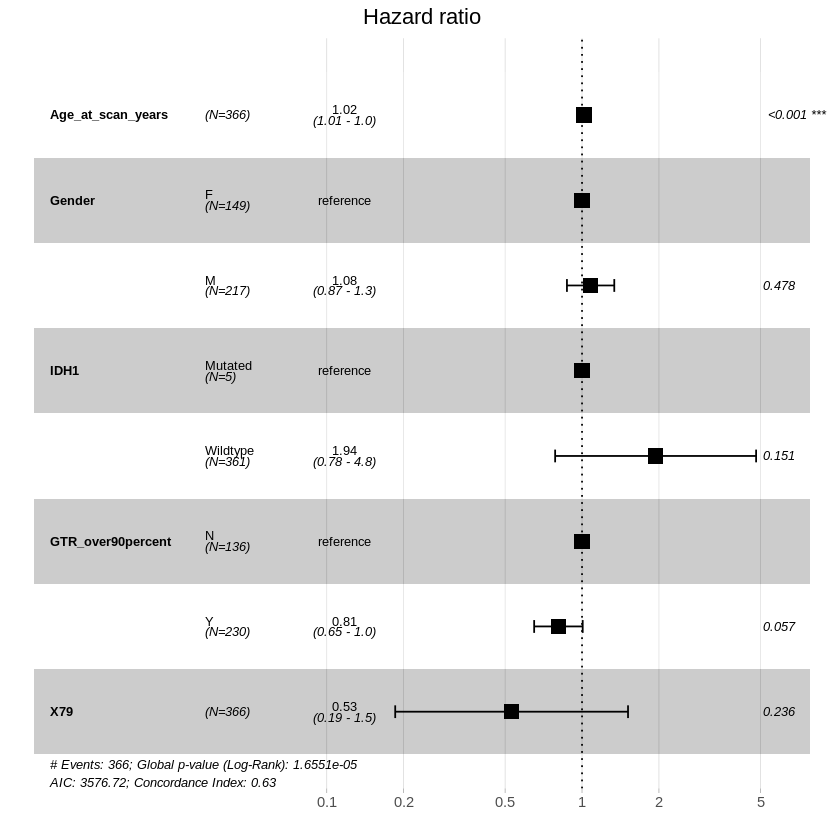

In [ ]:
# List of clinical features to adjust for
clinical_features <- c("Age_at_scan_years", "Gender", "IDH1", "GTR_over90percent")

# Extracted features from the model
extracted_features <- names(significant_features)  # Assuming significant_features is a vector of feature names

# Loop through each extracted feature and perform multivariate Cox analysis
for (feature in extracted_features) {

  # Create the Cox formula combining the clinical features with the current extracted feature
  formula <- as.formula(paste("Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~",
                              paste(c(clinical_features, feature), collapse = " + ")))

  # Fit the multivariable Cox model
  multivariable_cox <- coxph(formula, data = merged_data)

  # Print the summary of the model
  print(paste("Cox Model for Extracted Feature:", feature))
  print(summary(multivariable_cox))

  # Check the proportional hazards assumption
  ph_test <- cox.zph(multivariable_cox)
  print(ph_test)

  # Visualize the multivariable Cox model using a forest plot
  p <- ggforest(multivariable_cox, data = merged_data)
  print(p)
}


Call:
coxph(formula = formula, data = merged_data)

  n= 382, number of events= 382 

      coef exp(coef) se(coef)     z Pr(>|z|)  
X25 1.3275    3.7714   0.6345 2.092   0.0364 *
X82 1.0204    2.7744   0.4479 2.278   0.0227 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    exp(coef) exp(-coef) lower .95 upper .95
X25     3.771     0.2652     1.088    13.079
X82     2.774     0.3604     1.153     6.674

Concordance= 0.544  (se = 0.017 )
Likelihood ratio test= 8.15  on 2 df,   p=0.02
Wald test            = 8.32  on 2 df,   p=0.02
Score (logrank) test = 8.27  on 2 df,   p=0.02


        chisq df    p
X25    2.6601  1 0.10
X82    0.0234  1 0.88
GLOBAL 2.6962  2 0.26


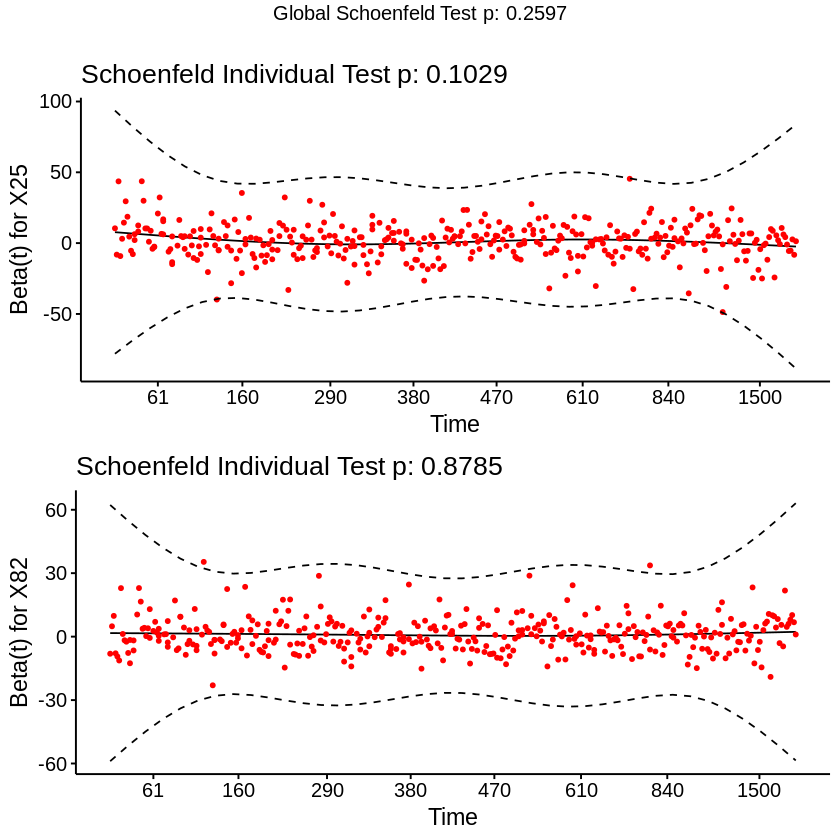

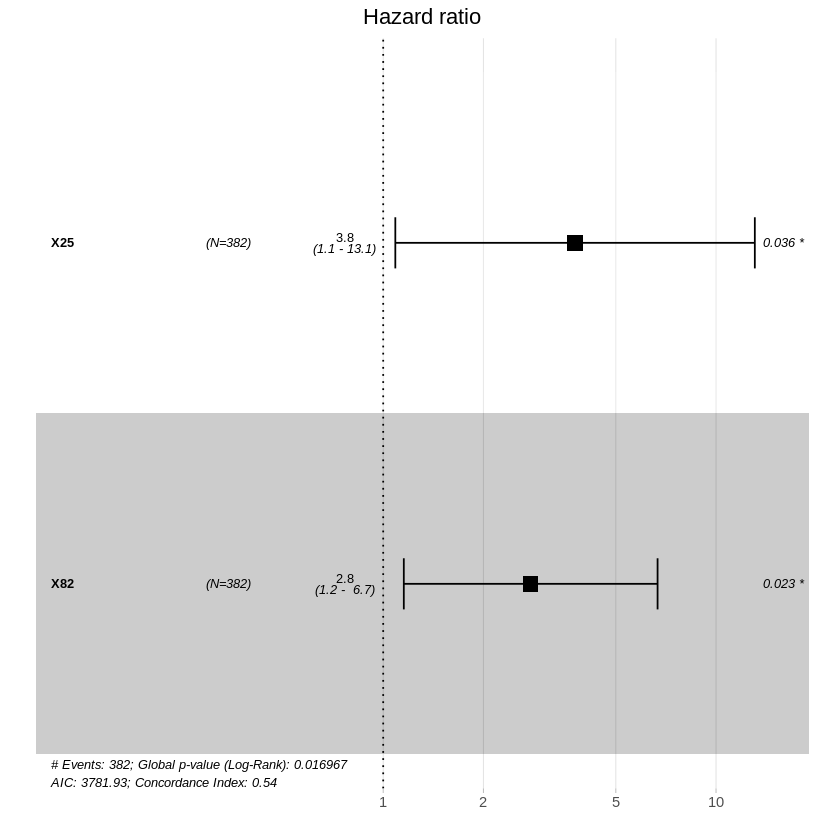

In [ ]:
# Combining significant features with clinical data for multivariable analysis
selected_features <- names(significant_features)
formula <- as.formula(paste("Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~", paste(c( selected_features), collapse = " + ")))

multivariable_cox <- coxph(formula, data = merged_data)
summary(multivariable_cox)

ph_test <- cox.zph(multivariable_cox)
print(ph_test)
ggcoxzph(ph_test)

# Visualize multivariable Cox model
ggforest(multivariable_cox, data = merged_data)

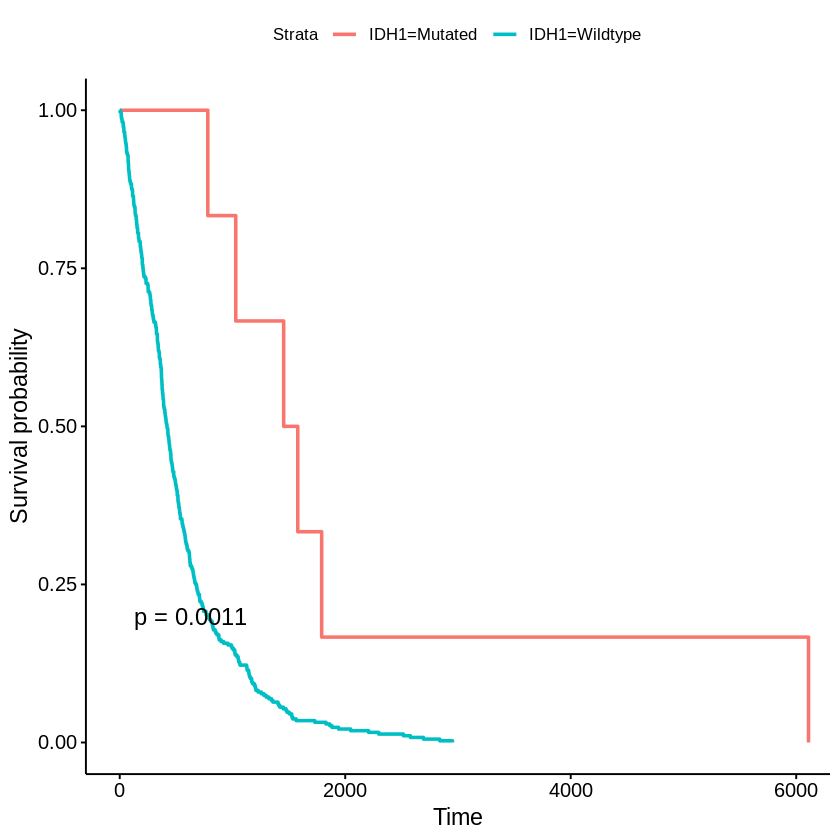

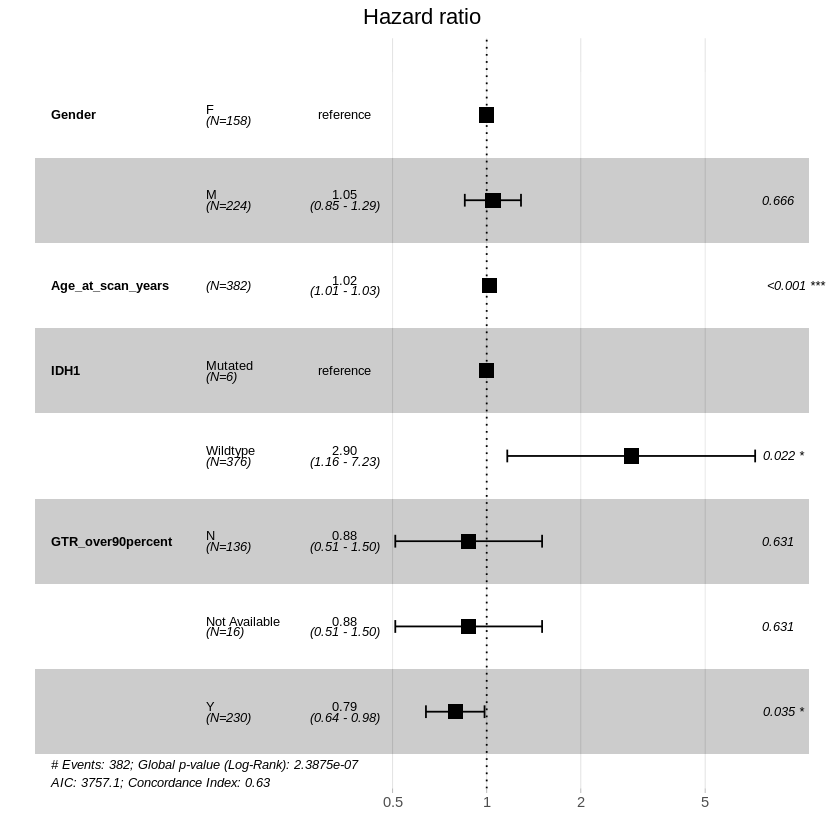

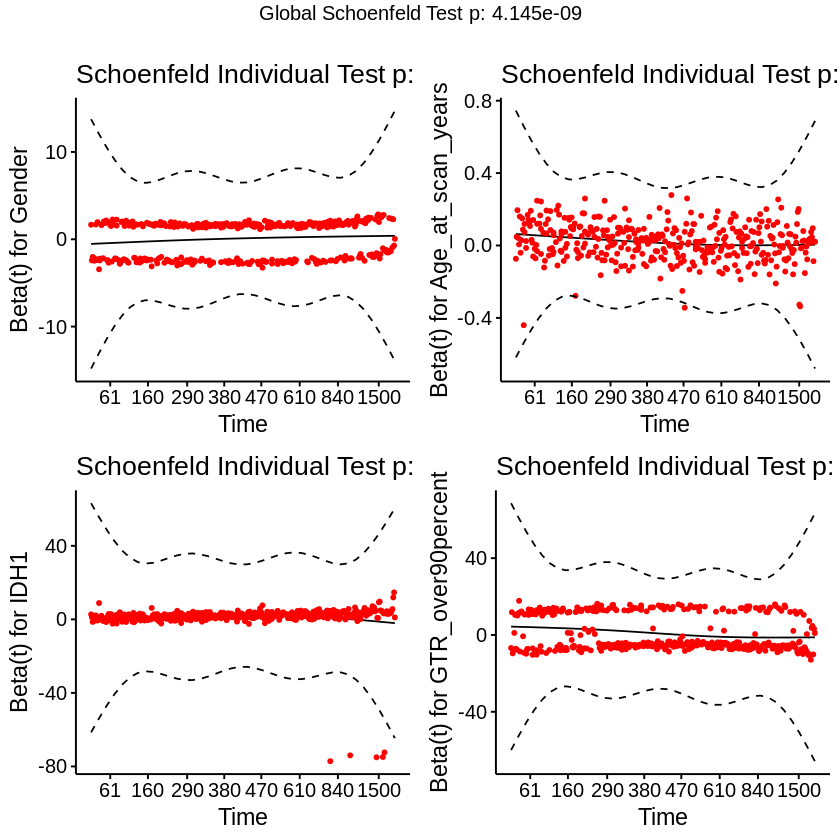

In [ ]:
# Kaplan-Meier survival curves for categorical variables (e.g., IDH status)
fit <- survfit(Surv(Survival_from_surgery_days_UPDATED, Survival_Status) ~ IDH1, data = merged_data)
ggsurvplot(fit, data = merged_data, pval = TRUE)

# Visualize multivariable Cox model
ggforest(multivariable_cox, data = merged_data)

# Checking proportional hazards assumption
ph_test <- cox.zph(multivariable_cox)
ggcoxzph(ph_test)
